<a href="https://colab.research.google.com/github/camiearth/ML-Projects/blob/main/K-Nearest%20Neighbour%20(KNN)%20/Notebook%20(kNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**K-Nearest Neighbour (kNN)**

## Introduction to kNN Algorithm

K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. This algorithm is used for both classification and regression.  **How it works?** Given a new data point, the algorithm finds the k nearest points in the training dataset and then predicts the output of the new data point based on the majority class/category or average value of the k-nearest neighbors.

**Application of KNN algorithm**
1.  Disease prediction
2.  Handwriting recognition 
1.   Image classification


**Representation of KNN algorithm**

Image from https://www.javatpoint.com/k-nearest-neighbor-algorithm-for-machine-learning

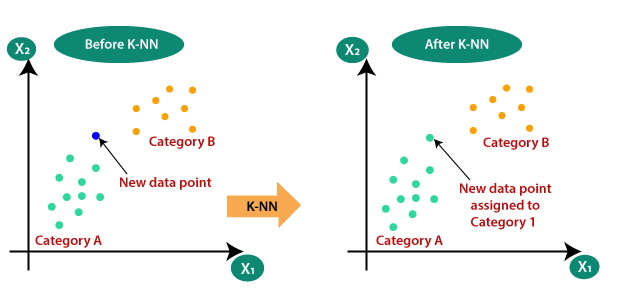

#**LET'S GET STARTED (:**

## Handwritten Digit Classification Problem




**The MNIST dataset**

`MNIST` is a classic dataset in machine learning. It consists of 28x28 gray-scale images handwritten digits between 0 and 9. The original training set contains 60,000 examples and the test set contains 10,000 examples. In this notebook we will be working with a subset of this data: a training set of 7,500 examples and a test set of 1,000 examples.

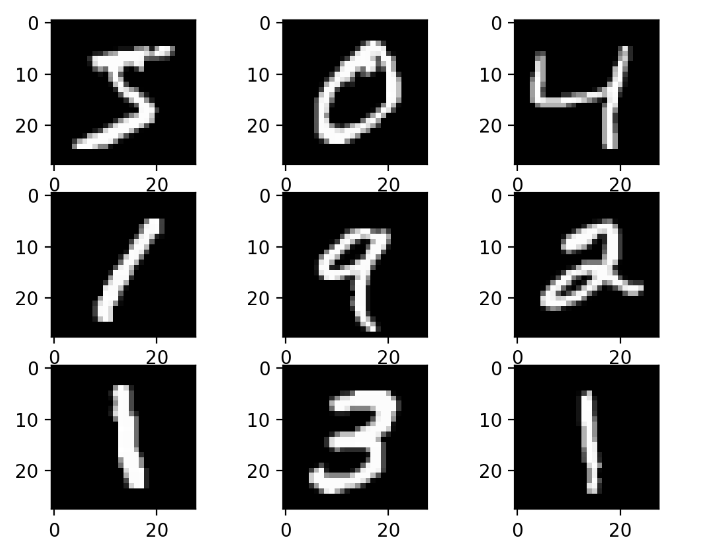

In [ ]:
# Import necessary libraries 

import numpy as np
import matplotlib.pyplot as plt 
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the training set
train_data = np.load('/content/drive/MyDrive/Colab Notebooks/1. kNN/NN_MNIST/MNIST/train_data.npy') ## Set your own path
train_labels = np.load('/content/drive/MyDrive/Colab Notebooks/1. kNN/NN_MNIST/MNIST/train_labels.npy') ## Set your own path 

# Load the testing set
test_data = np.load('/content/drive/MyDrive/Colab Notebooks/1. kNN/NN_MNIST/MNIST/test_data.npy') ## Set your own path
test_labels = np.load('/content/drive/MyDrive/Colab Notebooks/1. kNN/NN_MNIST/MNIST/test_labels.npy') ## Set your own path

In [ ]:
# Check their dimensions
print("Training dataset dimensions: ", np.shape(train_data))
print("Number of training labels: ", len(train_labels))
print("Testing dataset dimensions: ", np.shape(test_data))
print("Number of testing labels: ", len(test_labels))

Training dataset dimensions:  (7500, 784)
Number of training labels:  7500
Testing dataset dimensions:  (1000, 784)
Number of testing labels:  1000


In [ ]:
# Compute the number of examples of each digit
train_digits, train_counts = np.unique(train_labels, return_counts=True)
print("Distribution of the training set:")
print(dict(zip(train_digits, train_counts)))

test_digits, test_counts = np.unique(test_labels, return_counts=True)
print("Distribution of the test set:")
print(dict(zip(test_digits, test_counts)))

Distribution of the training set:
{0: 750, 1: 750, 2: 750, 3: 750, 4: 750, 5: 750, 6: 750, 7: 750, 8: 750, 9: 750}
Distribution of the test set:
{0: 100, 1: 100, 2: 100, 3: 100, 4: 100, 5: 100, 6: 100, 7: 100, 8: 100, 9: 100}


##Data Visualization

Each data point is stored as 784-dimensional vector. To visualize a data point, we first reshape it to a 28x28 image.  Each element in the 784-dimensional vector corresponds to a pixel in the 28x28 image. If the data point corresponds to a handwritten digit, reshaping it into an image allows us to see the shape of the digit and potentially identify which digit it represents. Therefore, reshaping the vector into an image is a useful step for visualizing and interpreting the data.

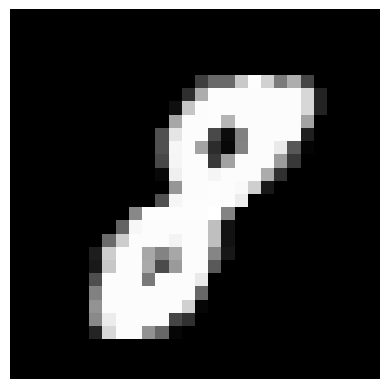

Label: 8


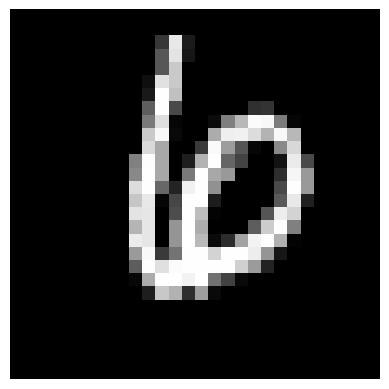

Label: 6


In [ ]:
# Define a function that displays a digit given its vector representation and reshape it
def display_digit(digit_vector):
    plt.imshow(digit_vector.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.show()

# Define a function that takes an index into a particular data set ("train" or "test") and displays that image.
def vis_image(index, dataset="train"):
    data = train_data if dataset == "train" else test_data
    labels = train_labels if dataset == "train" else test_labels
    display_digit(data[index])
    print("Label:", labels[index])

# View the third data point in the training set
vis_image(2, "train")

# Now view the third data point in the test set
vis_image(2, "test")

## Euclidian Distance
To compute nearest neighbors in our data set, we need to first be able to compute distances between data points. A natural distance function is  `Euclidian distance`  

In [ ]:
# Computes squared Euclidean distance between two vectors.
def euclidian_dist(x,y):
    return np.sum(np.square(x-y))

# Compute distance between a sevent and a one in our training set.
print("Distance from 7 to 1: ", euclidian_dist(train_data[4,],train_data[5,]))

# Compute distance between a seven and a two in our training set.
print("Distance from 7 to 2: ", euclidian_dist(train_data[4,],train_data[1,]))

# Compute distance between two seven's in our training set.
print("Distance from 7 to 7: ", euclidian_dist(train_data[4,],train_data[7,]))

Distance from 7 to 1:  5357193.0
Distance from 7 to 2:  12451684.0
Distance from 7 to 7:  5223403.0


In [ ]:
# Takes a vector x and returns the index of its nearest neighbor in train_data
def find_NN(x):
    # Compute distances from x to every row in train_data
    distances = [euclidian_dist(x,train_data[i,]) for i in range(len(train_labels))]
    # Get the index of the smallest distance
    return np.argmin(distances)

# Takes a vector x and returns the class of its nearest neighbor in train_data
def NN_classifier(x):
    # Get the index of the the nearest neighbor
    index = find_NN(x)
    # Return its class
    return train_labels[index]

A success case:
NN classification:  0
True label:  0
The test image:


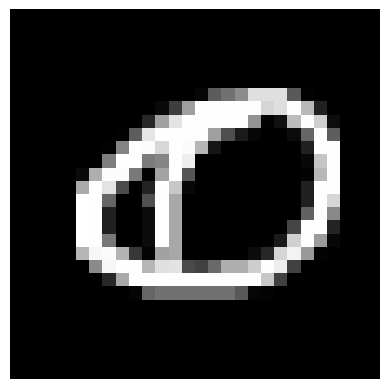

Label: 0
The corresponding nearest neighbor image:


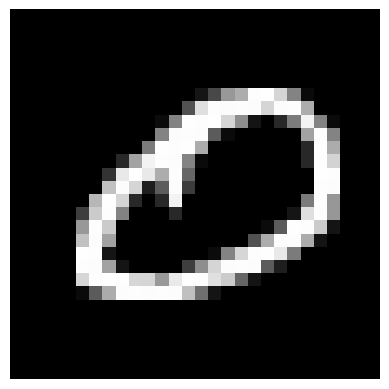

Label: 0


In [ ]:
## A success case:
print("A success case:")
print("NN classification: ", NN_classifier(test_data[0,])) # Use the NN_classifier to predict  the label of the first test data point
print("True label: ", test_labels[0]) 
print("The test image:")
vis_image(0, "test")
print("The corresponding nearest neighbor image:")
vis_image(find_NN(test_data[0,]), "train") # Use the find_NN function to find the index of the nearest neighbor of the first test data point in the training set

A failure case:
NN classification:  2
True label:  3
The test image:


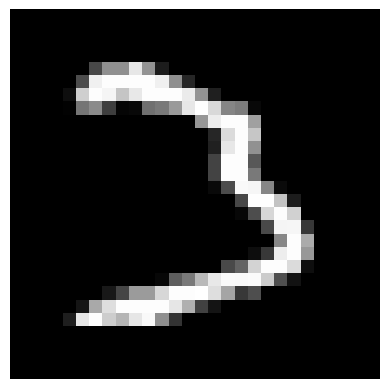

Label: 3
The corresponding nearest neighbor image:


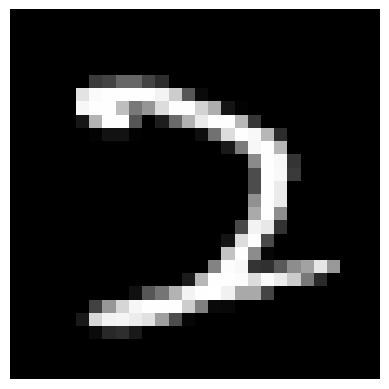

Label: 2


In [ ]:
## A failure case:
print("A failure case:")
print("NN classification: ", NN_classifier(test_data[39,]))
print("True label: ", test_labels[39])
print("The test image:")
vis_image(39, "test")
print("The corresponding nearest neighbor image:")
vis_image(find_NN(test_data[39,]), "train")

The above two examples show the results of the NN classifier on test points number 0 and 39.

Now we test point number 100.


NN classification:  4
True label:  4
The test image:


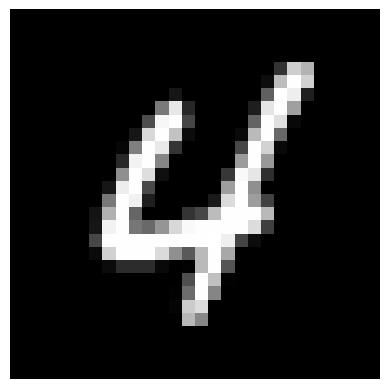

Label: 4
The corresponding nearest neighbor image:


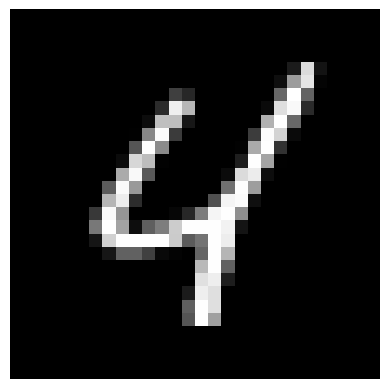

Label: 4


In [ ]:
print("NN classification: ", NN_classifier(test_data[100,])) 
print("True label: ", test_labels[100])
print("The test image:")
vis_image(100, "test")
print("The corresponding nearest neighbor image:")
vis_image(find_NN(test_data[100,]), "train")

Application of the nearest neighbor classifier over the full data set

In [ ]:
# Compute the test set predictions and measure the classification time
t_before = time.time()
test_predictions = [NN_classifier(test_data[i]) for i in range(len(test_labels))]
t_after = time.time()
classification_time = t_after - t_before

# Compute the error rate by comparing the predictions to the true labels
error_rate = sum(test_predictions[i] != test_labels[i] for i in range(len(test_labels))) / len(test_labels)

# Display the results
print("Error of nearest neighbor classifier: {:.3f}".format(error_rate))
print("Classification time: {:.3f} seconds".format(classification_time))

Error of nearest neighbor classifier: 0.046
Classification time: 65.957 seconds


**COMMENT**

The `error of nearest neighbor classifier` refers to the fraction of test data points that were misclassified by the classifier. In this case, the error rate is 0.046 or 4.6%. This means that out of all the test data points, just 4.6% of them were misclassified by the nearest neighbor classifier.

The "classification time" refers to the time it took for the classifier to make predictions on the test set. The classification time is an important metric to consider when evaluating the performance of a classifier, as it can affect the scalability and usability of the classifier in real-world applications.